In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/Medicaid_data.csv")
df.head()

,Utilization Type,State,NDC,Labeler Code,Product Code,Package Size,Year,Quarter,Suppression Used,Product Name,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed
0,FFSU,AK,2143380,2,1433,80,2025,2,False,TRULICITY,216.0,107.0,102976.40,98630.87,4345.53
1,FFSU,AK,2143480,2,1434,80,2025,2,False,TRULICITY,218.0,109.0,104481.92,101806.64,2675.28
2,FFSU,AK,2143611,2,1436,11,2025,2,False,EMGALITY P,21.0,20.0,15227.25,15227.25,0.00
3,FFSU,AK,2144511,2,1445,11,2025,2,False,TALTZ AUTO,33.0,30.0,231532.28,231532.28,0.00
4,FFSU,AK,2145780,2,1457,80,2025,2,False,MOUNJARO,208.0,104.0,108908.80,105953.32,2955.48


In [3]:
df.columns

Index(['Utilization Type', 'State', 'NDC', 'Labeler Code', 'Product Code',
       'Package Size', 'Year', 'Quarter', 'Suppression Used', 'Product Name',
       'Units Reimbursed', 'Number of Prescriptions',
       'Total Amount Reimbursed', 'Medicaid Amount Reimbursed',
       'Non Medicaid Amount Reimbursed'],
      dtype='object')

In [4]:
# Remove the national/suppressed "XX" row
df = df[df['State'] != 'XX'].copy()
print("Dataset shape after removing XX:", df.shape)
print("Remaining states:", sorted(df['State'].unique()))

Dataset shape after removing XX: (1194315, 15)
Remaining states: ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


## Standardizing Product Names

In [5]:
import re


df["Product Name_raw"] = df["Product Name"]

def clean_product_name(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()                 
    x = re.sub(r"\s+", " ", x)        
    x = x.casefold()                   
    return x

df["Product Name_std"] = df["Product Name_raw"].apply(clean_product_name)

In [6]:
# objective 1: high cost and low cost drugs
drug_cost = df.groupby('Product Name_std')['Total Amount Reimbursed'].sum().reset_index()
drug_cost = drug_cost.sort_values(by='Total Amount Reimbursed', ascending=False)

In [7]:
high_cost_drugs = drug_cost.head(10)
high_cost_drugs

,Product Name_std,Total Amount Reimbursed
832,biktarvy,1.487752e+09
3451,jardiance,1.224935e+09
6718,trulicity,9.942157e+08
3353,invega sus,8.841717e+08
3154,humira(cf),8.621136e+08
3152,humira pen,7.755576e+08
5075,ozempic,6.612600e+08
1957,dupixent s,6.432030e+08
2055,eliquis,6.114578e+08
7410,zepbound,5.080595e+08


In [8]:
low_cost_drugs = drug_cost[drug_cost['Total Amount Reimbursed']> 0].tail(10)
low_cost_drugs

,Product Name_std,Total Amount Reimbursed
6981,vidaza,8.37
2894,glyrx (gly,6.14
3365,ipra/albut,6.08
6070,sm ibuprof,5.21
284,aller-chlo,4.64
5810,rocephin,3.56
5405,prevduo 3,3.00
1768,diflucan,1.00
7189,witch haze,0.84
7061,vonvendi 6,0.38


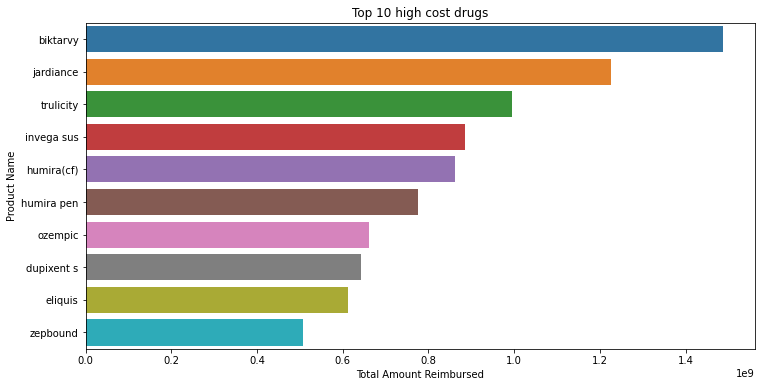

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(data=high_cost_drugs, x="Total Amount Reimbursed", y="Product Name_std")
plt.title('Top 10 high cost drugs')
plt.xlabel("Total Amount Reimbursed")
plt.ylabel('Product Name')
plt.show()

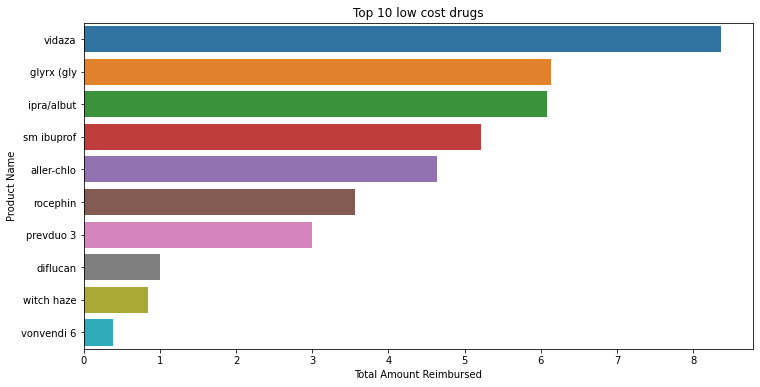

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(data=low_cost_drugs, x="Total Amount Reimbursed", y="Product Name_std")
plt.title('Top 10 low cost drugs')
plt.xlabel("Total Amount Reimbursed")
plt.ylabel('Product Name')
plt.show()

In [11]:
# objective 2:most popular drugs
drug_popularity = df.groupby('Product Name_std')['Number of Prescriptions'].sum().reset_index()
drug_popularity = drug_popularity.sort_values(by='Number of Prescriptions', ascending=False)

In [12]:
most_pop_drugs = drug_popularity.head(10)
most_pop_drugs

,Product Name_std,Number of Prescriptions
404,amoxicilli,8243538.0
261,albuterol,7264826.0
3223,ibuprofen,6543001.0
2636,fluticason,6042960.0
592,atorvastat,5987791.0
2764,gabapentin,5969243.0
4920,ondansetro,5741383.0
1177,cetirizine,5275403.0
4264,metformin,4655398.0
5982,sertraline,4481159.0


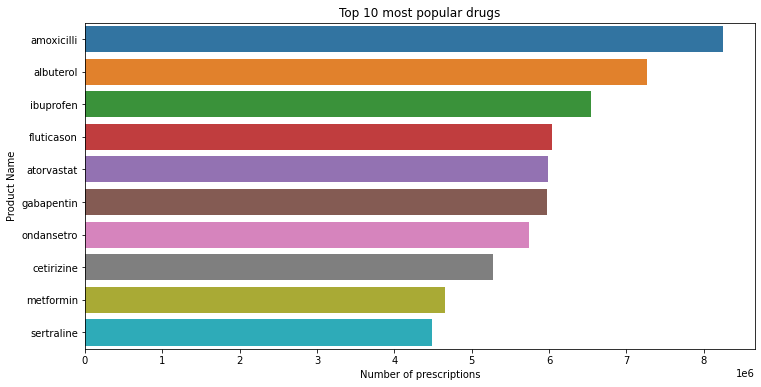

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(data=most_pop_drugs, x="Number of Prescriptions", y="Product Name_std")
plt.title('Top 10 most popular drugs')
plt.xlabel("Number of prescriptions")
plt.ylabel('Product Name')
plt.show()

In [14]:
state_drug_use = df.groupby('State')["Units Reimbursed"].sum().reset_index().sort_values(by='Units Reimbursed', ascending=False)
state_spending = df.groupby("State")['Total Amount Reimbursed'].sum().reset_index().sort_values(by="Total Amount Reimbursed", ascending=False)

In [15]:
state_drug_use.head(10)

,State,Units Reimbursed
4,CA,3.211247e+09
34,NY,2.403084e+09
35,OH,1.157968e+09
38,PA,1.060265e+09
44,TX,9.982072e+08
27,NC,8.075003e+08
22,MI,7.758629e+08
14,IL,7.165588e+08
9,FL,7.026974e+08
17,KY,6.896543e+08


In [16]:
state_spending.head(10)

,State,Total Amount Reimbursed
4,CA,8.143485e+09
34,NY,6.078539e+09
38,PA,2.644197e+09
35,OH,2.293810e+09
27,NC,2.265033e+09
22,MI,1.934683e+09
44,TX,1.749445e+09
14,IL,1.652224e+09
9,FL,1.643099e+09
15,IN,1.460833e+09
